<a href="https://colab.research.google.com/github/SrihithaReddy13/100-days-of-code/blob/master/User_Profile_Matching_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

IMPORTING DATASET

In [ ]:
df=pd.read_csv("/content/User Profile Matching in Social Networks (Responses) - Form Responses 1.csv")
df.head()

,Timestamp,Email Address,Name,Age,Zodiac,Gender,I'm an,I prefer,Books or Movies( Movies include TV Shows),Books or Movie Genre,"Music. Yeah yeah, there are over 900 types. Now just pick one from here...",Cook or Take out,Pets
0,9/8/2020 13:34:28,nandithankumar@gmail.com,Nanditha Menon,21,Leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Crime, Drama, Fantasy","Pop, Hip Hop, EDM",Both,Dogs
1,9/8/2020 14:43:00,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs
2,9/8/2020 14:44:08,meghanab2000@gmail.com,B Meghana,21,Pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Crime, Historical, Romance, Science Fiction","Hip Hop, Bollywood",Cook,No pets
3,9/8/2020 14:45:07,sayoojsanthosh21@gmail.com,Sayooj,20,NaN,Male,Ambivert,The great Outdoors,Movies,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Jazz, Rock Music, Country, Rap",Both,Both
4,9/8/2020 14:45:54,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs


In [ ]:
df.columns=["timestamp","email","name","age","sunSign","gender","character","preferance","TV","genres","music","food","pets"]

CLEANING THE DATA

In [ ]:
df.nunique()

timestamp     133
email         126
name          127
age            24
sunSign        30
gender          4
character       3
preferance      2
TV              3
genres        126
music          93
food            3
pets            9
dtype: int64

In [ ]:
df.drop_duplicates(subset=["email"],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 132
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   126 non-null    object
 1   email       126 non-null    object
 2   name        126 non-null    object
 3   age         126 non-null    int64 
 4   sunSign     109 non-null    object
 5   gender      126 non-null    object
 6   character   126 non-null    object
 7   preferance  126 non-null    object
 8   TV          126 non-null    object
 9   genres      126 non-null    object
 10  music       126 non-null    object
 11  food        126 non-null    object
 12  pets        126 non-null    object
dtypes: int64(1), object(12)
memory usage: 13.8+ KB


In [ ]:
df.index=range(len(df.index))

In [ ]:
df=df.drop(['timestamp'],axis=1)

In [ ]:
df.head()

,email,name,age,sunSign,gender,character,preferance,TV,genres,music,food,pets
0,nandithankumar@gmail.com,Nanditha Menon,21,Leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Crime, Drama, Fantasy","Pop, Hip Hop, EDM",Both,Dogs
1,titusaishu@gmail.com,Aishwarya Titus,21,Aries,Female,Ambivert,The great Outdoors,Both,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Country, Pop, Hip Hop, EDM",Both,Dogs
2,meghanab2000@gmail.com,B Meghana,21,Pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Crime, Historical, Romance, Science Fiction","Hip Hop, Bollywood",Cook,No pets
3,sayoojsanthosh21@gmail.com,Sayooj,20,NaN,Male,Ambivert,The great Outdoors,Movies,"Action Genre, Animation, Comedy Genre, Crime, ...","Blues, Jazz, Rock Music, Country, Rap",Both,Both
4,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,Pisces,Male,Ambivert,Warm and cozy Indoors.,Both,"Comedy Genre, Historical, Romance, Science Fic...","Jazz, Country, Pop, EDM",Both,Dogs


EXPLORATORAY DATA ANALYSIS

Gender Count Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


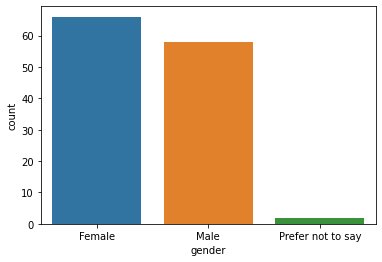

In [ ]:
sns.countplot(df.gender)

Handling the Zodiac Sign column data

In [ ]:
df.sunSign.unique()

array(['Leo', 'Aries', 'Pisces ', nan, 'Taurus', 'Gemini', 'Taurus ',
       'SAGITTARIUS', 'Cancer', '-', 'Libra', 'Capricorn ', 'Pisces',
       'Sagittarius', 'Capricon', 'Virgo',
       'Aquarius (according to tamil zodiac system)', 'Sagittarius ',
       'Capricorn', 'CANCER', 'pisces', 'Aquarius', 'No idea 😅',
       'Aquarius ', 'Gemini ', 'Scorpio', 'Scorpio ', 'Lion', 'No idea',
       'Who Cares'], dtype=object)

In [ ]:
for i in df.index:
  try:
    df["sunSign"][i]=df["sunSign"][i].lower()
  except:
    df['sunSign'][i]="NaN"
  temp=df["sunSign"][i].split(" ")
  df["sunSign"][i]=temp[0]
  if df["sunSign"][i] not in ("aries","taurus","leo","cancer","pisces","scorpio","libra","capricorn","virgo","sagittarius","gemini","aquarius"):
    df['sunSign'][i]="Not known"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib

Zodiac Count Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

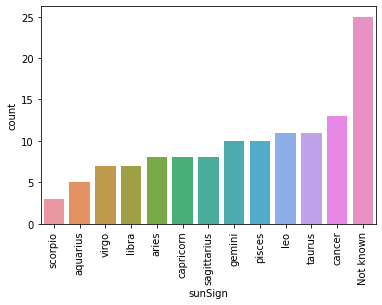

In [ ]:
order = df['sunSign'].value_counts(ascending=True).index
sns.countplot(x='sunSign', data=df, order=order)
plt.xticks(rotation=90)

Observation - Not many people seem to focus on their zodiac sign

Since not many people care about their zodiac sign, the weightage assigned to zodiac sign can be less compared to the other attributes.

Personality Count Plot

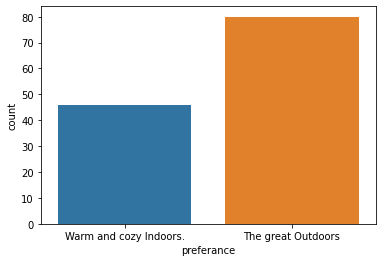

In [ ]:
order = df['preferance'].value_counts(ascending=True).index
sns.countplot(x='preferance', data=df, order=order)

Age Visual Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


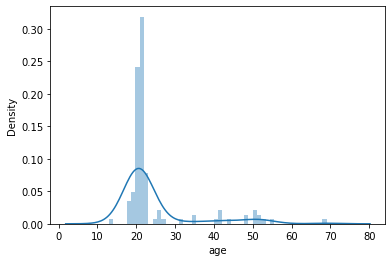

In [ ]:
sns.distplot(df.age)

The age is concentrate in the 20 and 21 but I think it is becuase the data is mostly collected from our collegemates.

Social Preferences

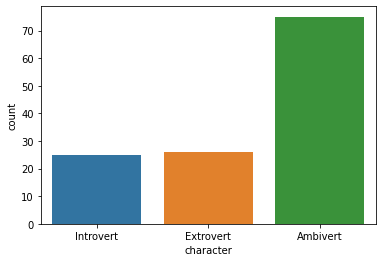

In [ ]:
order = df['character'].value_counts(ascending=True).index
sns.countplot(x='character', data=df, order=order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


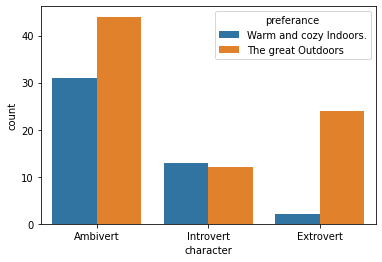

In [ ]:
sns.countplot(df.character, hue=df.preferance)

Introverts seem to not mind outdoor or indoor while leaning to the indoor. 
Ambiverts and extroverts have an outdoor prefernace.

Entertainment Preferences

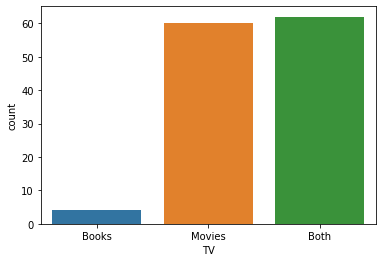

In [ ]:
order = df['TV'].value_counts(ascending=True).index
sns.countplot(x='TV', data=df, order=order)

There is a general liking towards TV shows compared to books. People who like only books seem to be very low.

Food Preferences


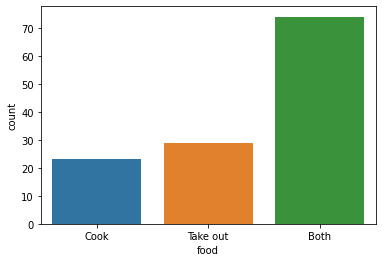

In [ ]:
order = df['food'].value_counts(ascending=True).index
sns.countplot(x='food', data=df, order=order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


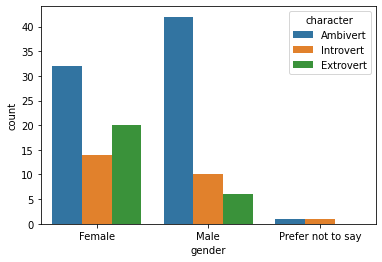

In [ ]:
sns.countplot(df.gender, hue=df.character)

Handling Pets column data

In [ ]:
for i in df.index:
  if df["pets"][i] not in ("Dogs","Cats","No pets"):
    df["pets"][i]="Other pets"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pet Preferences


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


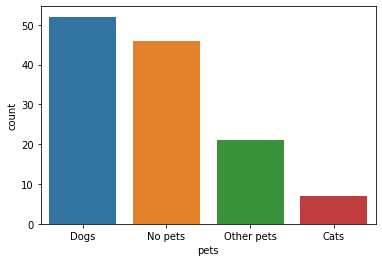

In [ ]:
sns.countplot(df.pets)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


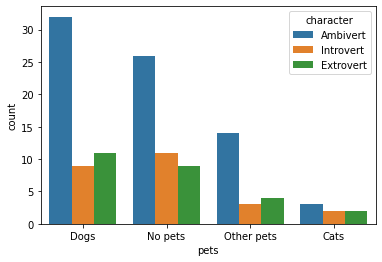

In [ ]:
sns.countplot(df.pets,hue=df.character)

Handling TV Show Genre column data

In [ ]:
listGenres=set(["Action Genre","Animation","Comedy Genre","Crime","Drama","Experimental","Fantasy","Historical","Horror","Romance","Science Fiction","Thriller","Western","Anime"])
for i in df.index:
  try:
    temp=df["genres"][i]
    temp=temp.split(",")
    temp=[j.strip() for j in temp]
    for k in range(len(temp)):
      if temp[k] not in listGenres:
        temp[k]="other TVShow Genre"
    df["genres"][i]=temp
  except:
    pass
listGenres.add("otherTVShowGenre")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
for i in listGenres:
  temp_list=[]
  for j in df.index:
    try:
      if i in df["genres"][j]:
        temp_list.append(1)
      else:
        temp_list.append(0)
    except:
      pass
  df[i]=temp_list

In [ ]:
df.drop(labels="genres",axis=1,inplace=True)
df.head()

,email,name,age,sunSign,gender,character,preferance,TV,music,food,pets,Action Genre,Drama,Historical,Romance,Experimental,Crime,Horror,Comedy Genre,Science Fiction,Fantasy,otherTVShowGenre,Anime,Thriller,Animation,Western
0,nandithankumar@gmail.com,Nanditha Menon,21,leo,Female,Ambivert,Warm and cozy Indoors.,Both,"Pop, Hip Hop, EDM",Both,Dogs,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,titusaishu@gmail.com,Aishwarya Titus,21,aries,Female,Ambivert,The great Outdoors,Both,"Blues, Country, Pop, Hip Hop, EDM",Both,Dogs,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0
2,meghanab2000@gmail.com,B Meghana,21,pisces,Female,Introvert,Warm and cozy Indoors.,Movies,"Hip Hop, Bollywood",Cook,No pets,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
3,sayoojsanthosh21@gmail.com,Sayooj,20,Not known,Male,Ambivert,The great Outdoors,Movies,"Blues, Jazz, Rock Music, Country, Rap",Both,Other pets,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0
4,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,pisces,Male,Ambivert,Warm and cozy Indoors.,Both,"Jazz, Country, Pop, EDM",Both,Dogs,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0


TV Genre Preferences


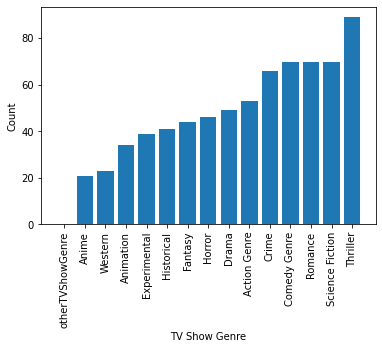

In [ ]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
# Counting the Genres of TV Shows and Movies for each person and summing them up
genreCount=[]
for i in listGenres:
  genreCount.append(df[i].sum())
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    l1 = [y for x, y in sorted(zipped_pairs)]
    return l1
listGenres=sort_list(listGenres,genreCount)
genreCount.sort()
ax.bar(listGenres, genreCount)  
ax.set_xlabel('TV Show Genre')  
ax.set_ylabel('Count')  
plt.xticks(rotation=90)
plt.show()  

Handling Music Genre column data

In [ ]:
listMusicGenres=set(["Blues","Jazz","Rock Music","Country","Pop","Hip Hop","EDM","K-POP","Rap"])
for i in df.index:
  try:
    temp=df["music"][i]
    temp=temp.split(",")
    temp=[j.strip() for j in temp]
    for k in range(len(temp)):
      if temp[k] not in listMusicGenres:
        temp[k]="otherMusic"
    df["music"][i]=temp
  except:
    pass
listMusicGenres.add("otherMusic")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
for i in listMusicGenres:
  temp_list=[]
  for j in df.index:
    try:
      if i in df["music"][j]:
        temp_list.append(1)
      else:
        temp_list.append(0)
    except:
      pass
  df[i]=temp_list

In [ ]:
df.drop(labels="music",axis=1,inplace=True)
df.head()

,email,name,age,sunSign,gender,character,preferance,TV,food,pets,Action Genre,Drama,Historical,Romance,Experimental,Crime,Horror,Comedy Genre,Science Fiction,Fantasy,otherTVShowGenre,Anime,Thriller,Animation,Western,Jazz,Blues,Pop,Rock Music,Country,Hip Hop,otherMusic,EDM,K-POP,Rap
0,nandithankumar@gmail.com,Nanditha Menon,21,leo,Female,Ambivert,Warm and cozy Indoors.,Both,Both,Dogs,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,titusaishu@gmail.com,Aishwarya Titus,21,aries,Female,Ambivert,The great Outdoors,Both,Both,Dogs,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0
2,meghanab2000@gmail.com,B Meghana,21,pisces,Female,Introvert,Warm and cozy Indoors.,Movies,Cook,No pets,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,sayoojsanthosh21@gmail.com,Sayooj,20,Not known,Male,Ambivert,The great Outdoors,Movies,Both,Other pets,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1
4,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,pisces,Male,Ambivert,Warm and cozy Indoors.,Both,Both,Dogs,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0


Music Preferences


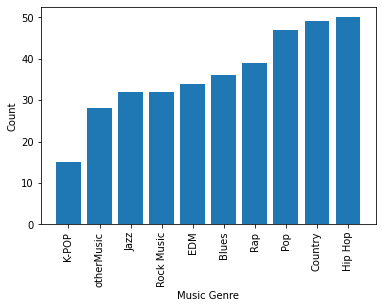

In [ ]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
# Counting Music genres in the same way as TV Show Genres
musicGenreCount=[]
for i in listMusicGenres:
  musicGenreCount.append(df[i].sum())
# Plotting the bar graph  
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    l1 = [y for x, y in sorted(zipped_pairs)]
    return l1
listMusicGenres=sort_list(listMusicGenres,musicGenreCount)
musicGenreCount.sort()
ax.bar(listMusicGenres, musicGenreCount)  
ax.set_xlabel('Music Genre')  
ax.set_ylabel('Count')  
plt.xticks(rotation=90)
plt.show()  

ENCODING OTHER CATEGORICAL DATA FOR CORRELATION

In [ ]:
dummies=pd.get_dummies(df.sunSign)
df=df.drop(['sunSign'],axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [ ]:
dummies=pd.get_dummies(df.food)
df=df.drop(['food'],axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [ ]:
df.rename(columns={'Both':'Both_Food'},inplace=True)

In [ ]:
dummies=pd.get_dummies(df.TV)
df=df.drop(['TV'],axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [ ]:
dummies=pd.get_dummies(df.pets)
df=df.drop(['pets'],axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [ ]:
dummies=pd.get_dummies(df.character)
df=df.drop(['character'],axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [ ]:
df.head()

,email,name,age,gender,preferance,Action Genre,Drama,Historical,Romance,Experimental,Crime,Horror,Comedy Genre,Science Fiction,Fantasy,otherTVShowGenre,Anime,Thriller,Animation,Western,Jazz,Blues,Pop,Rock Music,Country,Hip Hop,otherMusic,EDM,K-POP,Rap,Not known,aquarius,aries,cancer,capricorn,gemini,leo,libra,pisces,sagittarius,scorpio,taurus,virgo,Both_Food,Cook,Take out,Books,Both,Movies,Cats,Dogs,No pets,Other pets,Ambivert,Extrovert,Introvert
0,nandithankumar@gmail.com,Nanditha Menon,21,Female,Warm and cozy Indoors.,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,titusaishu@gmail.com,Aishwarya Titus,21,Female,The great Outdoors,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,meghanab2000@gmail.com,B Meghana,21,Female,Warm and cozy Indoors.,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,sayoojsanthosh21@gmail.com,Sayooj,20,Male,The great Outdoors,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath,20,Male,Warm and cozy Indoors.,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df['gender']= label_encoder.fit_transform(df['gender']) 
df['preferance']= label_encoder.fit_transform(df['preferance']) 

In [ ]:
details=df.iloc[:,:2]
details.head()

,email,name
0,nandithankumar@gmail.com,Nanditha Menon
1,titusaishu@gmail.com,Aishwarya Titus
2,meghanab2000@gmail.com,B Meghana
3,sayoojsanthosh21@gmail.com,Sayooj
4,vishnu21200@gmail.com,Vishnu Mahesh Pothuvath


In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.head()

,age,gender,preferance,Action Genre,Drama,Historical,Romance,Experimental,Crime,Horror,Comedy Genre,Science Fiction,Fantasy,otherTVShowGenre,Anime,Thriller,Animation,Western,Jazz,Blues,Pop,Rock Music,Country,Hip Hop,otherMusic,EDM,K-POP,Rap,Not known,aquarius,aries,cancer,capricorn,gemini,leo,libra,pisces,sagittarius,scorpio,taurus,virgo,Both_Food,Cook,Take out,Books,Both,Movies,Cats,Dogs,No pets,Other pets,Ambivert,Extrovert,Introvert
0,21,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,21,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,21,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,20,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,20,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,:1])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
temp=scaler.transform(df.iloc[:,:1])
temp=pd.DataFrame(temp,columns=['age_normalized'])
df=pd.concat([temp,df],axis=1,sort=False)

In [ ]:
df=df.drop(['age'],axis=1)

In [ ]:
df.head()

,age_normalized,gender,preferance,Action Genre,Drama,Historical,Romance,Experimental,Crime,Horror,Comedy Genre,Science Fiction,Fantasy,otherTVShowGenre,Anime,Thriller,Animation,Western,Jazz,Blues,Pop,Rock Music,Country,Hip Hop,otherMusic,EDM,K-POP,Rap,Not known,aquarius,aries,cancer,capricorn,gemini,leo,libra,pisces,sagittarius,scorpio,taurus,virgo,Both_Food,Cook,Take out,Books,Both,Movies,Cats,Dogs,No pets,Other pets,Ambivert,Extrovert,Introvert
0,0.142857,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,0.142857,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,0.142857,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,0.125000,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,0.125000,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


CORRELATION HEATMAP

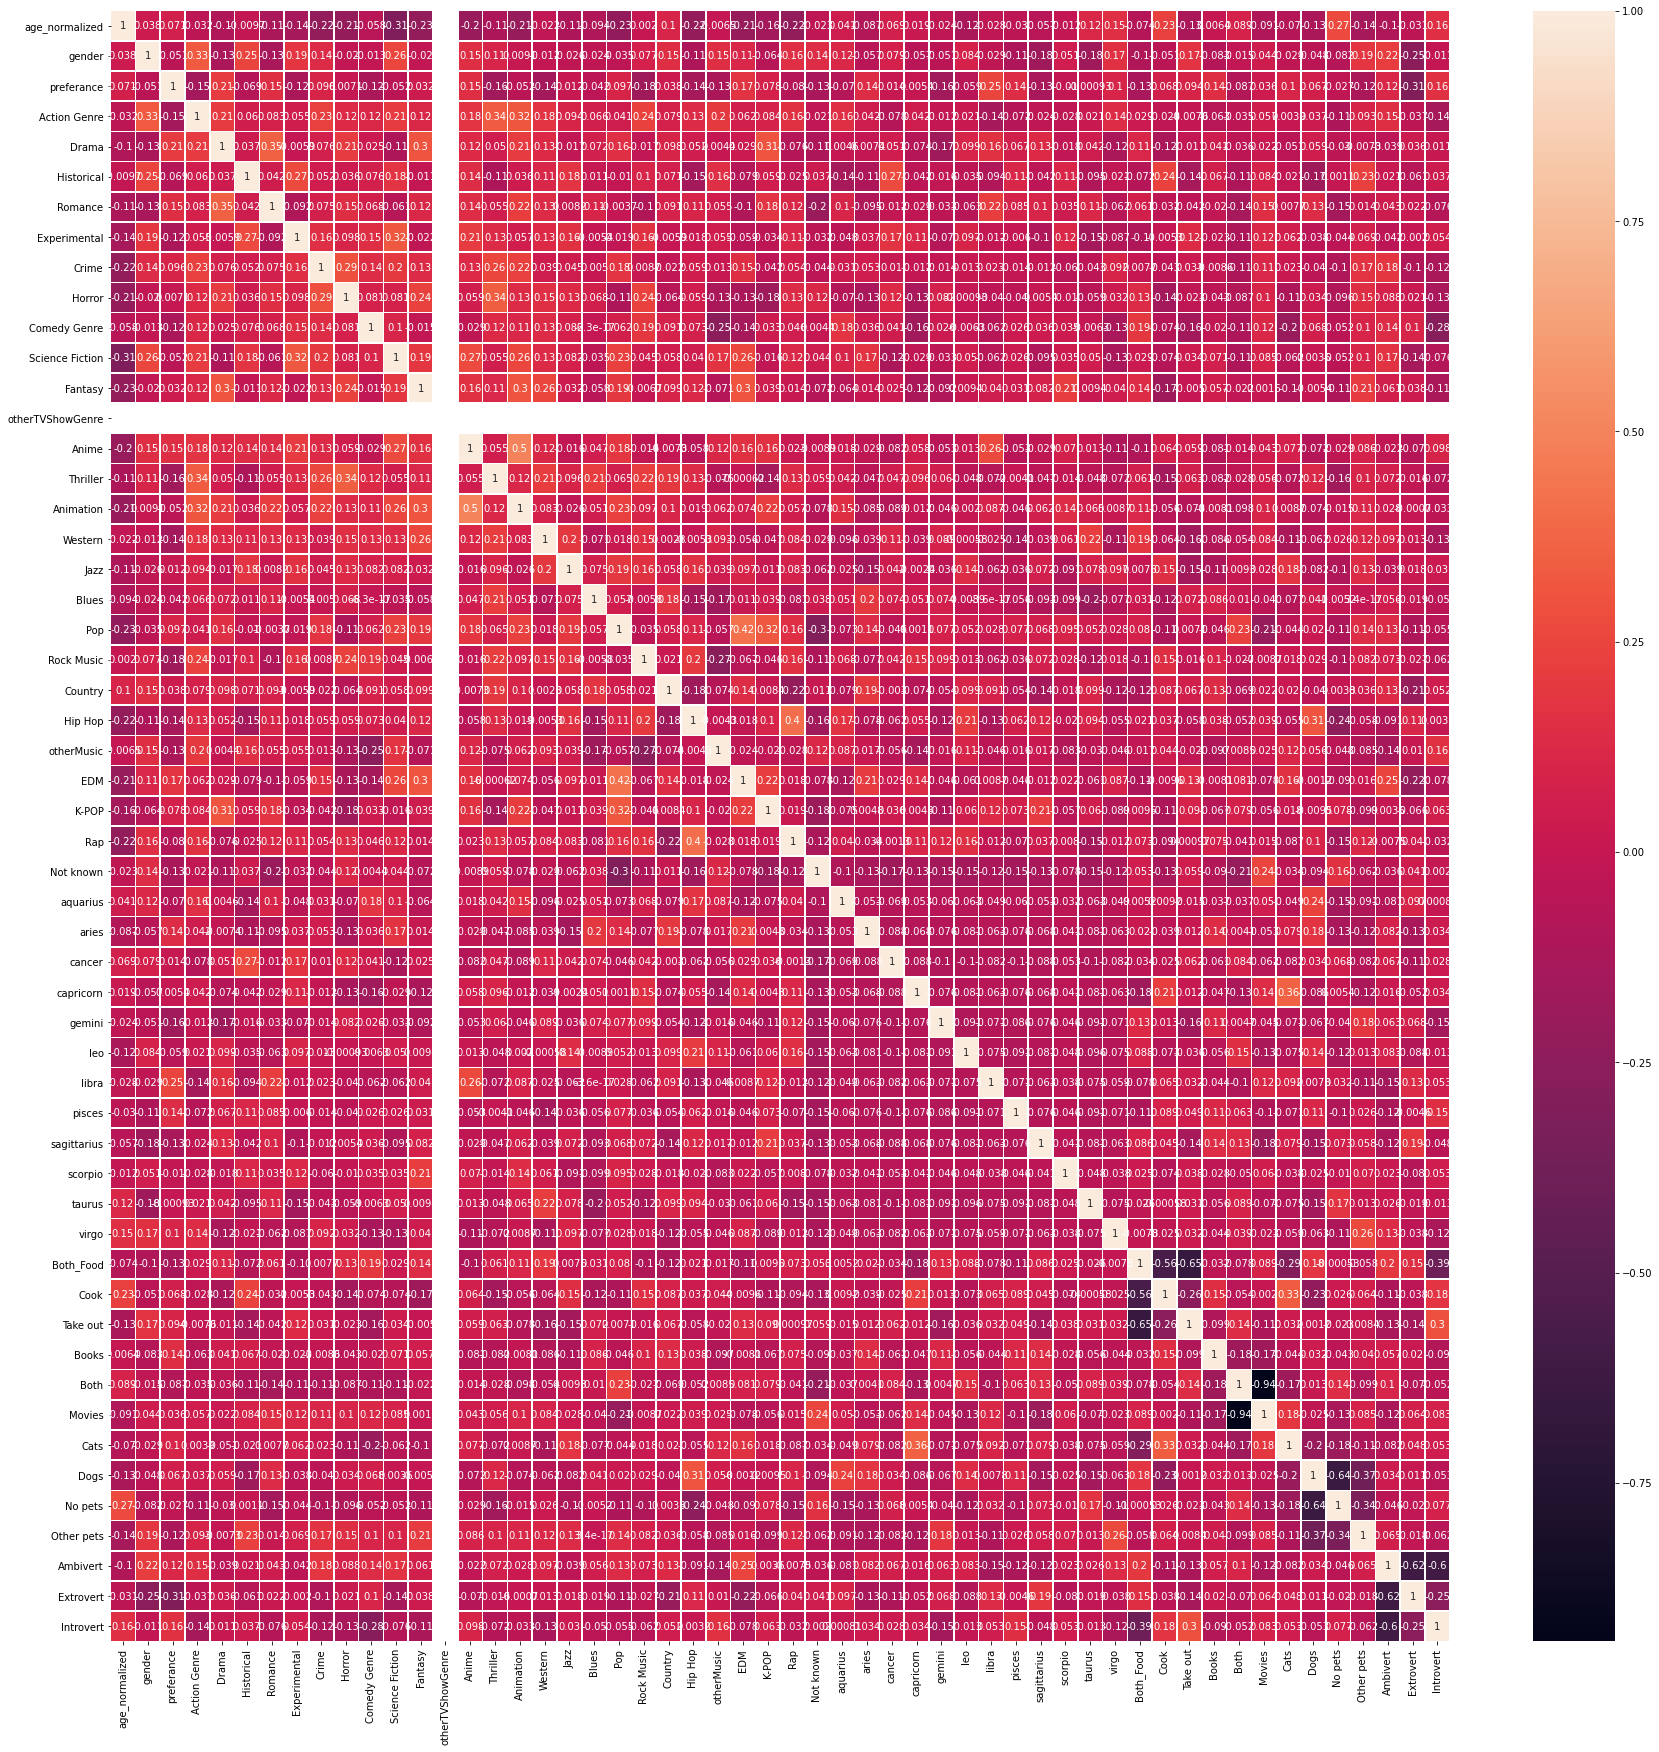

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30))     
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

When variables used in clustering have strong correlation, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated

STRONG CORRELATION FEATURES LIST -

In [ ]:
corr = df.corr()
c1 = corr.abs()
upper = c1.where(np.triu(np.ones(c1.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
print(to_drop)

['Cook', 'Take out', 'Movies', 'No pets', 'Extrovert', 'Introvert']


In [ ]:
df.drop(columns=to_drop,axis=1,inplace=True)

#  CLUSTERING ALGORITHMS

### HIERARCHICAL CLUSTERING

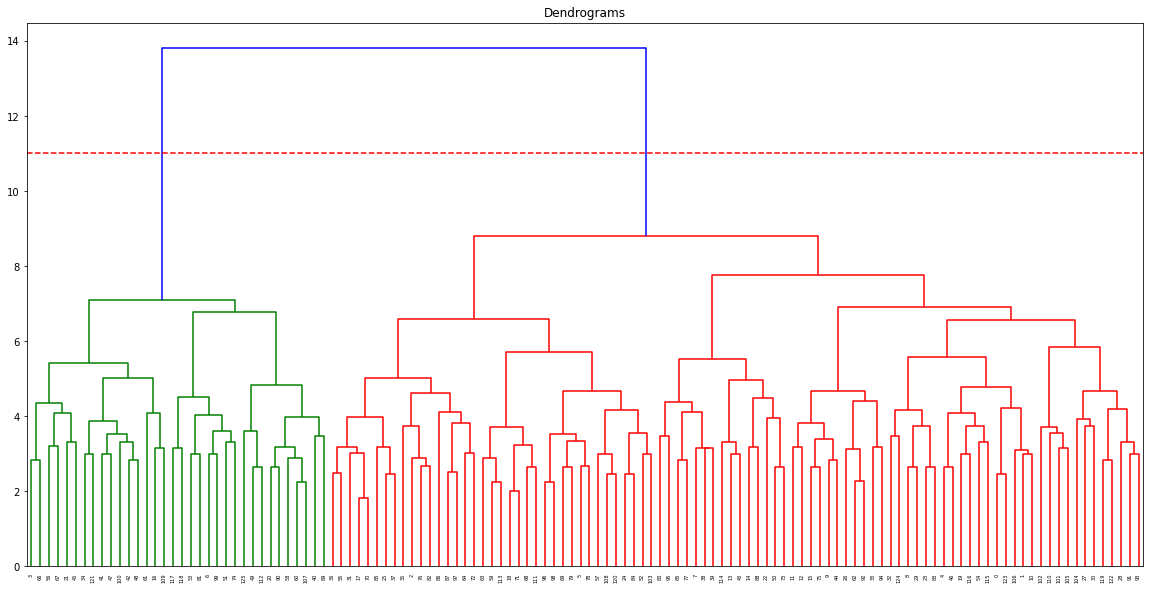

In [172]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
linkage=hc.linkage(df, method='ward')
dend = hc.dendrogram(linkage)
plt.axhline(y=11, color='r', linestyle='--')

In [156]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(linkage,2,criterion='maxclust')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



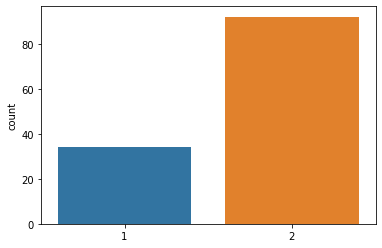

In [157]:
sns.countplot(fl)

In [158]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(df)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=fl,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### KMEANS


In [159]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=3).fit(df)

In [160]:
y_kmeans=kmeans.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



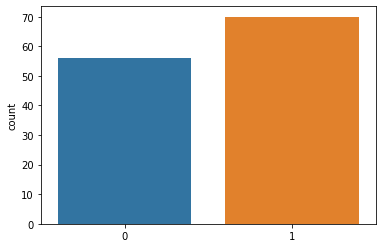

In [161]:
sns.countplot(y_kmeans)

In [162]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
components = pca.fit_transform(df)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_kmeans,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

###DBSCAN

In [163]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=5).fit(df)
db_lables=clustering.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



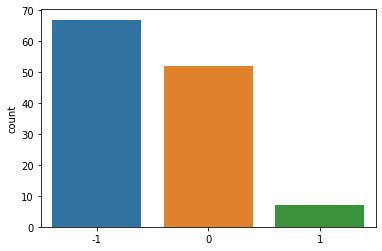

In [164]:
sns.countplot(db_lables)

-1 -> Noisy samples
DBSCAN is classifying more than 40 users as noisy sample - not suitable for clustering this way. Inaccurate

In [165]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
components = pca.fit_transform(df)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=db_lables,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#PERFORMANCE EVALUATION METRICS

In [170]:
from sklearn import metrics

cluster_metrics=pd.DataFrame(columns=['silhoutte score','db score'],index=['hierarchical','kmeans','dbscan'])
cluster_metrics['silhoutte score']['hierarchical']=metrics.silhouette_score(df, fl, metric='euclidean')
cluster_metrics['silhoutte score']['kmeans']=metrics.silhouette_score(df, y_kmeans, metric='euclidean')
cluster_metrics['silhoutte score']['dbscan']=metrics.silhouette_score(df, db_lables, metric='euclidean')

cluster_metrics['db score']['hierarchical']=metrics.davies_bouldin_score(df, fl)
cluster_metrics['db score']['kmeans']=metrics.davies_bouldin_score(df, y_kmeans)
cluster_metrics['db score']['dbscan']=metrics.davies_bouldin_score(df, db_lables)

In [171]:
cluster_metrics

,silhoutte score,db score
hierarchical,0.102525,2.7592
kmeans,0.100286,2.88047
dbscan,0.042867,3.17225


Other evaluation metrics are not usable since this is an unsupervised clustering.

# Nearest Neighbour Search

In [ ]:
df['cluster_ward']=fl

In [ ]:
df['cluster_kmeans']=y_kmeans

In [ ]:
cluster1=df[df['cluster_kmeans']==1]

In [ ]:
cluster2=df[df['cluster_kmeans']==0]

### KNN *WITHOUT TAKING THE CLUSTERS INTO CONSIDERATION*

In [ ]:
import time

start=time.time()

from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(df)
distances, indices = nbrs.kneighbors(df)

end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.01264333724975586


In [ ]:
nearest={}
for i in indices:
  cur=details['name'][i[0]]
  nearest[cur]=[]
  for j in i:
    nearest[cur].append(details['name'][j])

In [ ]:
nearest['Nanditha Menon']

['Nanditha Menon', 'Sneha', 'Vismaya R Mohan', 'Yukta Srivastava', 'Sai sudha']

In [ ]:
nearest['Srihitha']

['Srihitha', 'Seema', 'Neshva Salim', 'Jaswanth', 'Subhadra Narayanan Kutty']

In [ ]:
nearest['Rishi']

['Rishi', 'Muralidhar', 'Krishnasagar', 'Vikram Chandrasekaran', 'Mithun']

In [ ]:
nearest['Aakarsh']

['Aakarsh', 'Viswesh K S', 'V.N.V SRI RAM ', 'Sanjay', 'Harsha']

### KNN *TAKING THE CLUSTERS INTO CONSIDERATION*

In [ ]:
import time

start=time.time()

from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(cluster2)
distances2, indices2 = nbrs.kneighbors(cluster2)


end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.005358695983886719


In [ ]:
 map_index2={}
 k=0
 for i in cluster2.index:
   map_index2[k]=i
   k+=1

In [ ]:
nearest_2={}
k=0
for i in cluster2.index:
  cur=details['name'][i]
  nearest_2[cur]=[]
  for j in indices2[k]:
    nearest_2[cur].append(details['name'][map_index2[j]])
  k+=1

In [ ]:
nearest_2['Aakarsh']

['Aakarsh', 'Viswesh K S', 'V.N.V SRI RAM ', 'Sanjay', 'Harsha']

In [ ]:
nearest_2['Rishi']

['Rishi', 'Muralidhar', 'Krishnasagar', 'Mithun', 'Midhun Babu']

In [150]:
import time

start=time.time()
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(cluster1)
distances1, indices1 = nbrs.kneighbors(cluster1)
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.0038836002349853516


In [ ]:
 map_index1={}
 k=0
 for i in cluster1.index:
   map_index1[k]=i
   k+=1

In [ ]:
nearest_1={}
k=0
for i in cluster1.index:
  cur=details['name'][i]
  nearest_1[cur]=[]
  for j in indices1[k]:
    nearest_1[cur].append(details['name'][map_index1[j]])
  k+=1

In [ ]:
nearest_1['Srihitha']

['Srihitha', 'Seema', 'Neshva Salim', 'Jaswanth', 'Subhadra Narayanan Kutty']

In [ ]:
nearest_1['Nanditha Menon']

['Nanditha Menon',
 'Sneha',
 'Vismaya R Mohan',
 'Yukta Srivastava',
 'Nivitha Varghese ']

#ADVANTAGES

1.   Clustering the users reduces the size of the dataset passed into the knn algorithm. This in turn leads to reduced execution time while finding k nearest neighbours of the current node.
2.   Clustering can also provide deeper insights into the users through clusters and related cluster analysis.



#DISADVANTAGES
1. The nodes near the edge might suffer from variation in predictions if the clusters are not far enough. 

#FUTURE DIRECTION
1. Add columns with descriptive sentences so users are able to express themselves more and then try to find the nearest neighbours or clusters.